In [51]:
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# filename = "test2/mkp.sim-image.fits"
filename = "test2/mkp.sim-dirty.fits"
hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)

In [52]:
hdu.header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    4 / number of data axes                            
NAXIS1  =                  512 / length of data axis 1                          
NAXIS2  =                  512 / length of data axis 2                          
NAXIS3  =                    1 / length of data axis 3                          
NAXIS4  =                    1 / length of data axis 4                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BSCALE  =                   1.                                                  
BZERO   =                   0.                                                  
BUNIT   = 'JY/BEAM '        

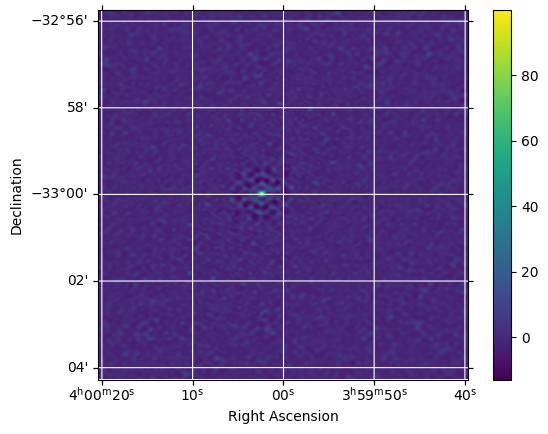

In [60]:
# data shape: (corr, freq, dec, ra)
fig, ax = plt.subplots(subplot_kw=dict(projection=wcs, slices=('x', 'y', 0, 0)))
im = ax.imshow(hdu.data.squeeze().T, origin='lower')
ax.grid(color='white', ls='solid')
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
fig.colorbar(im, ax=ax)

In [54]:
from casatasks import listobs, listvis, vishead, visstat, listsdm

In [55]:
vis="test1/mkp.sim.0.1h.8.0s.ms/"

In [56]:
listobs(vis)

{'BeginTime': 61013.90047205946,
 'EndTime': 61013.904638726126,
 'IntegrationTime': 360.0,
 'field_0': {'code': '',
  'direction': {'m0': {'unit': 'rad', 'value': 1.0471975511965976},
   'm1': {'unit': 'rad', 'value': -0.5759586531581288},
   'refer': 'J2000',
   'type': 'direction'},
  'name': '00'},
 'nfields': 1,
 'numrecords': 131670,
 'scan_1': {'0': {'BeginTime': 61013.90047205946,
   'EndTime': 61013.904638726126,
   'FieldId': 0,
   'FieldName': '00',
   'IntegrationTime': 8.0,
   'SpwIds': array([0]),
   'StateId': 0,
   'nRow': 131670,
   'scanId': 1}},
 'timeref': 'UTC'}

In [57]:
vishead(vis, mode='list')

{'telescope': (array(['meerkat'], dtype='<U7'), {}),
 'observer': (array(['CASA simulator'], dtype='<U14'), {}),
 'project': (array(['CASA simulation'], dtype='<U15'), {}),
 'field': (array(['00'], dtype='<U2'), {}),
 'freq_group_name': (array(['Group 1'], dtype='<U7'), {}),
 'spw_name': (array(['00'], dtype='<U2'), {}),
 'schedule': ({'r1': False}, {}),
 'schedule_type': (array([''], dtype='<U5'), {}),
 'release_date': (array([0.]),
  {'MEASINFO': {'Ref': 'UTC', 'type': 'epoch'},
   'QuantumUnits': array(['s'], dtype='<U1')})}

In [58]:
# listvis(vis, datacolumn='corrected', listfile="test2/vislist.txt")